In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
new_df = pd.read_csv('edamovie3.csv')
new_df.head()

,Unnamed: 0.1,Unnamed: 0,originalTitle,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres_x,release_days,tconst,titleType,isAdult,startYear,runtimeMinutes,genres_y,averageRating,numVotes,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,0,0,Super 30,"$2,269,878",24701637,Reliance Big Pictures,"$871,256",317,NaN,NaN,"Biography,Drama",173,tt7485048,movie,0,2019,154.0,"Biography,Drama",7.9,33523,9,nm0618898,producer,producer,NaN,Sajid Nadiadwala,1966.0,NaN,"producer,writer,director","tt7518786,tt2372222,tt8366590,tt7721946"
1,1,1,Ad Astra,"$50,188,370",127461872,Twentieth Century Fox,"$19,001,398","3,460","$90,000,000",PG-13,"Adventure,Drama,Mystery,Sci-Fi,Thriller",105,tt2935510,movie,0,2019,123.0,"Adventure,Drama,Mystery",6.5,239699,9,nm1250070,producer,producer,NaN,Jeremy Kleiner,NaN,NaN,"producer,miscellaneous","tt2024544,tt1020072,tt4975722,tt7125860"
2,2,2,The Art of Self-Defense,"$2,410,914",2414269,Bleecker Street Media,"$114,374",7,NaN,R,"Action,Comedy,Crime,Drama,Mystery,Thriller",173,tt7339248,movie,0,2019,104.0,"Action,Comedy,Crime",6.6,38502,9,nm3442546,producer,producer,NaN,Stephanie Whonsetler,NaN,NaN,"production_manager,miscellaneous,producer","tt6269368,tt10962368,tt7339248,tt4595186"
3,4,4,Welcome to Marwen,"$10,763,520",13061491,Universal Pictures,"$2,354,205","1,911",NaN,PG-13,"Biography,Comedy,Drama,Fantasy,Romance",376,tt3289724,movie,0,2018,116.0,"Biography,Comedy,Drama",6.2,24570,9,nm0823330,producer,producer,NaN,Steve Starkey,NaN,NaN,"producer,assistant_director,editorial_department","tt0109830,tt0118884,tt1907668,tt0162222"
4,5,5,Arctic,"$2,410,795",4124015,Bleecker Street Media,"$50,878",4,NaN,PG-13,"Adventure,Drama",334,tt6820256,movie,0,2018,98.0,"Adventure,Drama",6.8,53579,9,nm2468967,composer,NaN,NaN,Joseph Trapanese,NaN,NaN,"composer,music_department,soundtrack","tt2908446,tt1483013,tt3410834,tt1485796"


In [2]:
#cleaning the opening_theaters columns using regex string search method
new_df['opening_theaters'] = new_df.opening_theaters.str.replace(',','',regex=True)
#invalid parsing will be set as NaN by the parameter errors = 'coerce'
new_df['opening_theaters'] =  pd.to_numeric(new_df['opening_theaters'], errors='coerce')

In [3]:
#astype(int) convert dataframe to int dtype
new_df['budget'] = new_df.budget.str.replace('$','',regex=True)
new_df['budget'] = new_df.budget.str.replace(',','',regex=True)
new_df['budget'] =  pd.to_numeric(new_df['budget'], errors='coerce')

In [4]:
new_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'originalTitle', 'domestic_revenue',
       'world_revenue', 'distributor', 'opening_revenue', 'opening_theaters',
       'budget', 'MPAA', 'genres_x', 'release_days', 'tconst', 'titleType',
       'isAdult', 'startYear', 'runtimeMinutes', 'genres_y', 'averageRating',
       'numVotes', 'ordering', 'nconst', 'category', 'job', 'characters',
       'primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles'],
      dtype='object')

In [5]:
new_df['characters'].unique()

array([nan, '["BTS"]', '["Collin Williams"]', '["Self - Keyboards"]',
       '["Julian"]', '["Rick Rosen"]', '["Little Girl\'s Mum"]',
       '["Lumiere"]', '["Self"]', '["The Wizard Puppet"]',
       '["Jugador futbolín 1"]', '["Tony"]'], dtype=object)

In [6]:
new_df = new_df.drop(['Unnamed: 0.1','Unnamed: 0','genres_x','domestic_revenue','opening_revenue','nconst','deathYear','job','characters','birthYear'],axis = 1)

In [7]:
new_df.head()

,originalTitle,world_revenue,distributor,opening_theaters,budget,MPAA,release_days,tconst,titleType,isAdult,startYear,runtimeMinutes,genres_y,averageRating,numVotes,ordering,category,primaryName,primaryProfession,knownForTitles
0,Super 30,24701637,Reliance Big Pictures,317.0,NaN,NaN,173,tt7485048,movie,0,2019,154.0,"Biography,Drama",7.9,33523,9,producer,Sajid Nadiadwala,"producer,writer,director","tt7518786,tt2372222,tt8366590,tt7721946"
1,Ad Astra,127461872,Twentieth Century Fox,3460.0,90000000.0,PG-13,105,tt2935510,movie,0,2019,123.0,"Adventure,Drama,Mystery",6.5,239699,9,producer,Jeremy Kleiner,"producer,miscellaneous","tt2024544,tt1020072,tt4975722,tt7125860"
2,The Art of Self-Defense,2414269,Bleecker Street Media,7.0,NaN,R,173,tt7339248,movie,0,2019,104.0,"Action,Comedy,Crime",6.6,38502,9,producer,Stephanie Whonsetler,"production_manager,miscellaneous,producer","tt6269368,tt10962368,tt7339248,tt4595186"
3,Welcome to Marwen,13061491,Universal Pictures,1911.0,NaN,PG-13,376,tt3289724,movie,0,2018,116.0,"Biography,Comedy,Drama",6.2,24570,9,producer,Steve Starkey,"producer,assistant_director,editorial_department","tt0109830,tt0118884,tt1907668,tt0162222"
4,Arctic,4124015,Bleecker Street Media,4.0,NaN,PG-13,334,tt6820256,movie,0,2018,98.0,"Adventure,Drama",6.8,53579,9,composer,Joseph Trapanese,"composer,music_department,soundtrack","tt2908446,tt1483013,tt3410834,tt1485796"


In [8]:
#
new_df['ordering'].value_counts()

9    725
8      9
4      4
6      4
7      4
2      3
3      2
1      1
5      1
Name: ordering, dtype: int64

In [9]:
new_df['category'].value_counts()

producer               350
composer               129
writer                 126
cinematographer         77
editor                  44
actor                   12
director                 5
production_designer      5
self                     2
actress                  2
archive_footage          1
Name: category, dtype: int64

In [10]:
new_df = new_df.drop(['primaryProfession','knownForTitles'], axis=1)

new_df.head()

,originalTitle,world_revenue,distributor,opening_theaters,budget,MPAA,release_days,tconst,titleType,isAdult,startYear,runtimeMinutes,genres_y,averageRating,numVotes,ordering,category,primaryName
0,Super 30,24701637,Reliance Big Pictures,317.0,NaN,NaN,173,tt7485048,movie,0,2019,154.0,"Biography,Drama",7.9,33523,9,producer,Sajid Nadiadwala
1,Ad Astra,127461872,Twentieth Century Fox,3460.0,90000000.0,PG-13,105,tt2935510,movie,0,2019,123.0,"Adventure,Drama,Mystery",6.5,239699,9,producer,Jeremy Kleiner
2,The Art of Self-Defense,2414269,Bleecker Street Media,7.0,NaN,R,173,tt7339248,movie,0,2019,104.0,"Action,Comedy,Crime",6.6,38502,9,producer,Stephanie Whonsetler
3,Welcome to Marwen,13061491,Universal Pictures,1911.0,NaN,PG-13,376,tt3289724,movie,0,2018,116.0,"Biography,Comedy,Drama",6.2,24570,9,producer,Steve Starkey
4,Arctic,4124015,Bleecker Street Media,4.0,NaN,PG-13,334,tt6820256,movie,0,2018,98.0,"Adventure,Drama",6.8,53579,9,composer,Joseph Trapanese


In [11]:
##finding all null values
feature_with_nan = [feature for feature in new_df.columns if new_df[feature].isnull().sum()>0]
for feature in feature_with_nan:
    print(feature,np.round(new_df[feature].isnull().sum()),"missing values after update")

opening_theaters 18 missing values after update
budget 525 missing values after update
MPAA 73 missing values after update
runtimeMinutes 12 missing values after update
genres_y 1 missing values after update


In [12]:
new_df['MPAA'].dtypes

dtype('O')

In [13]:
#value_counts is pandas function that count the unique value present in dataset
new_df['MPAA'].value_counts()

R            314
PG-13        245
PG           113
G              6
Not Rated      2
Name: MPAA, dtype: int64

In [14]:
#calculating the mode 
new_df['MPAA'].mode()

0    R
Name: MPAA, dtype: object

since MPAA is our chategorical data and having mode as R, we are replacing null values by mode

In [15]:
#fillna function replace the null rows with particular value assigned to it's parameter
new_df['MPAA'] = new_df['MPAA'].fillna('R')

In [16]:
new_df['MPAA'].isnull().sum()

0

In [17]:
new_df['runtimeMinutes'].dtypes

dtype('float64')

In [18]:
new_df['runtimeMinutes'].value_counts()

102.0    27
109.0    24
100.0    23
90.0     21
107.0    19
         ..
75.0      1
54.0      1
181.0     1
47.0      1
52.0      1
Name: runtimeMinutes, Length: 106, dtype: int64

In [19]:
new_df['runtimeMinutes'].isnull().sum()

12

(array([0.00053981, 0.00080972, 0.        , 0.00107962, 0.00053981,
        0.        , 0.00080972, 0.00377868, 0.01052632, 0.02159244,
        0.02348178, 0.02402159, 0.02321188, 0.01808367, 0.01673414,
        0.01133603, 0.00755735, 0.0099865 , 0.00593792, 0.00431849,
        0.00350877, 0.00431849, 0.00215924, 0.00134953, 0.00161943,
        0.00080972, 0.00080972, 0.00026991, 0.00026991, 0.00053981]),
 array([ 45.,  50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95.,
        100., 105., 110., 115., 120., 125., 130., 135., 140., 145., 150.,
        155., 160., 165., 170., 175., 180., 185., 190., 195.]),
 <BarContainer object of 30 artists>)

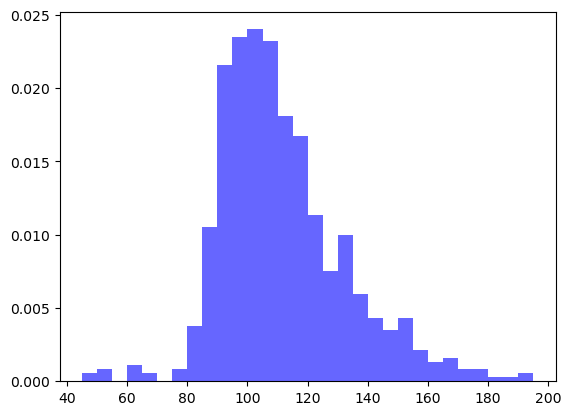

In [20]:
#ploting the probability density of runtime by setting tranparancy
#as 0.6,bins size as 30 and density is True becasue it is pdf
import matplotlib.pyplot as plt
plt.hist(new_df['runtimeMinutes'], bins=30, density=True, alpha=0.6, color='blue')

In [21]:
new_df['genres_y'] = new_df['genres_y'].fillna('Drama')

In [22]:
new_df['genres_y'].isnull().sum()

0

In [23]:
new_df.isnull().sum()

originalTitle         0
world_revenue         0
distributor           0
opening_theaters     18
budget              525
MPAA                  0
release_days          0
tconst                0
titleType             0
isAdult               0
startYear             0
runtimeMinutes       12
genres_y              0
averageRating         0
numVotes              0
ordering              0
category              0
primaryName           0
dtype: int64

In [24]:
new_df.isnull().sum()

originalTitle         0
world_revenue         0
distributor           0
opening_theaters     18
budget              525
MPAA                  0
release_days          0
tconst                0
titleType             0
isAdult               0
startYear             0
runtimeMinutes       12
genres_y              0
averageRating         0
numVotes              0
ordering              0
category              0
primaryName           0
dtype: int64

In [25]:
new_df['runtimeMinutes'].unique

<bound method Series.unique of 0      154.0
1      123.0
2      104.0
3      116.0
4       98.0
       ...  
748     83.0
749     97.0
750      NaN
751      NaN
752     52.0
Name: runtimeMinutes, Length: 753, dtype: float64>

In [26]:
#reading the runtime sheet that has missing values data present
df1 = pd.read_excel('data__.xlsx',sheet_name='runtime')

In [27]:
df1.head()

,tconst,runtimeMinutes
0,tt9724318,160
1,tt13217216,95
2,tt13726852,102
3,tt7402432,116
4,tt18304552,104


In [28]:
#converting that sheet into dict dtypes of rows and columns by zipping 
d = dict(zip(df1['tconst'], df1['runtimeMinutes']))
#here we will use map function to ittrate over d and use its value to fill null value in runtime
new_df['runtimeMinutes'] = new_df['runtimeMinutes'].fillna(new_df['tconst'].map(d))

In [29]:
new_df['runtimeMinutes'].isnull().sum()

0

In [30]:
df2 = pd.read_excel('data__.xlsx',sheet_name='opening_theaters')

In [31]:
df2.head()

,tconst,opening_theaters
0,tt8878922,0
1,tt11043394,0
2,tt11177804,20000
3,tt5938950,0
4,tt11394318,4


In [32]:
d = dict(zip(df2['tconst'], df2['opening_theaters']))
#alternative with Series
#d = df2.set_index('age')['val_main']
new_df['opening_theaters'] = new_df['opening_theaters'].fillna(new_df['tconst'].map(d))

In [33]:
new_df['opening_theaters'].isnull().sum()

0

In [34]:
df3 = pd.read_excel('manual_data.xlsx')

In [35]:
df3.head()

,Unnamed: 0,originalTitle,budget
0,0,Super 30,24701637
1,2,The Art of Self-Defense,2414269
2,4,Welcome to Marwen,13061491
3,5,Arctic,4165776
4,8,Kalank,17987034


In [36]:
df3['budget'].dtypes

dtype('int64')

In [37]:
new_df['world_revenue'].dtypes

dtype('int64')

In [38]:
d_p = dict(zip(df3['originalTitle'], df3['budget']))
new_df['budget'] = new_df['budget'].fillna(new_df['originalTitle'].map(d_p))

In [39]:
new_df['budget'].isnull().sum()

0

In [40]:
new_df.isnull().sum()

originalTitle       0
world_revenue       0
distributor         0
opening_theaters    0
budget              0
MPAA                0
release_days        0
tconst              0
titleType           0
isAdult             0
startYear           0
runtimeMinutes      0
genres_y            0
averageRating       0
numVotes            0
ordering            0
category            0
primaryName         0
dtype: int64

In [41]:
new_df = new_df.drop(['isAdult','titleType','tconst'], axis=1)

new_df.head()

,originalTitle,world_revenue,distributor,opening_theaters,budget,MPAA,release_days,startYear,runtimeMinutes,genres_y,averageRating,numVotes,ordering,category,primaryName
0,Super 30,24701637,Reliance Big Pictures,317.0,24701637.0,R,173,2019,154.0,"Biography,Drama",7.9,33523,9,producer,Sajid Nadiadwala
1,Ad Astra,127461872,Twentieth Century Fox,3460.0,90000000.0,PG-13,105,2019,123.0,"Adventure,Drama,Mystery",6.5,239699,9,producer,Jeremy Kleiner
2,The Art of Self-Defense,2414269,Bleecker Street Media,7.0,2414269.0,R,173,2019,104.0,"Action,Comedy,Crime",6.6,38502,9,producer,Stephanie Whonsetler
3,Welcome to Marwen,13061491,Universal Pictures,1911.0,13061491.0,PG-13,376,2018,116.0,"Biography,Comedy,Drama",6.2,24570,9,producer,Steve Starkey
4,Arctic,4124015,Bleecker Street Media,4.0,4165776.0,PG-13,334,2018,98.0,"Adventure,Drama",6.8,53579,9,composer,Joseph Trapanese


In [42]:
new_df['budget'].dtypes

dtype('float64')

In [43]:
new_df['budget'].isnull().sum()

0

In [44]:
new_df.isnull().sum()

originalTitle       0
world_revenue       0
distributor         0
opening_theaters    0
budget              0
MPAA                0
release_days        0
startYear           0
runtimeMinutes      0
genres_y            0
averageRating       0
numVotes            0
ordering            0
category            0
primaryName         0
dtype: int64

In [45]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   originalTitle     753 non-null    object 
 1   world_revenue     753 non-null    int64  
 2   distributor       753 non-null    object 
 3   opening_theaters  753 non-null    float64
 4   budget            753 non-null    float64
 5   MPAA              753 non-null    object 
 6   release_days      753 non-null    int64  
 7   startYear         753 non-null    int64  
 8   runtimeMinutes    753 non-null    float64
 9   genres_y          753 non-null    object 
 10  averageRating     753 non-null    float64
 11  numVotes          753 non-null    int64  
 12  ordering          753 non-null    int64  
 13  category          753 non-null    object 
 14  primaryName       753 non-null    object 
dtypes: float64(4), int64(5), object(6)
memory usage: 88.4+ KB


In [49]:
#adding index columns so that we can impute our categorical variable
new_df = new_df.reset_index().rename(columns={'index': 'ID'})

# Set the 'ID' column as the index
new_df = new_df.set_index('ID')


In [52]:
#obtaining the categorical variable
categorical_feature = [feature for feature in new_df.columns if new_df[feature].dtypes=='O']

In [53]:
##now replacing the categorical variable  by its index number
"""
new_df.groupby([feature])['world_revenue'].mean().sort_values().index

df.groupby([feature]): This groups the DataFrame df by a categorical feature specified in the feature argument. 
This creates a group of rows for each unique value of the feature in the DataFrame.
['world_revenue']: This selects the 'world_revenue' column from the grouped DataFrame.
.mean(): This calculates the mean value of the 'world_revenue' column for each group.
.sort_values(): This sorts the groups in ascending order of their mean 'world_revenue' values.
.index: This extracts the index of the sorted groups.

values:index for index,values in enumerate(labels_ordered,0)

creates a dictionary where the keys are the group labels sorted by the mean 'world_revenue', 
and the values are integer indices starting from 0.

"""
for feature in categorical_feature:

    labels_ordered=new_df.groupby([feature])['world_revenue'].mean().sort_values().index
    
    labels_ordered={values:index for index,values in enumerate(labels_ordered,0)}
    new_df[feature]=new_df[feature].map(labels_ordered)

In [57]:
new_df.head()

,originalTitle,world_revenue,distributor,opening_theaters,budget,MPAA,release_days,startYear,runtimeMinutes,genres_y,averageRating,numVotes,ordering,category,primaryName
ID,,,,,,,,,,,,,,,
0,384,24701637,88,317.0,24701637.0,1,173,2019,154.0,88,7.9,33523,9,8,353
1,602,127461872,103,3460.0,90000000.0,3,105,2019,123.0,139,6.5,239699,9,8,557
2,132,2414269,43,7.0,2414269.0,1,173,2019,104.0,131,6.6,38502,9,8,124
3,287,13061491,104,1911.0,13061491.0,3,376,2018,116.0,122,6.2,24570,9,8,269
4,170,4124015,43,4.0,4165776.0,3,334,2018,98.0,73,6.8,53579,9,7,320


In [58]:
#since ID and world revenue are not needed to scaled down we don't need it
feature_scale=[feature for feature in new_df.columns if feature not in ['ID','world_revenue']]
#import MinMaxScaler library from sklearn preprocessing for scaling the values between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(new_df[feature_scale])

MinMaxScaler()

fit() on a dataset calculates the minimum and maximum values of each feature column in the dataset and perform the scaling when calling the transform() method.

In [56]:
scaler.transform(new_df[feature_scale])

array([[5.10638298e-01, 8.07339450e-01, 1.58500000e-02, ...,
        1.00000000e+00, 8.00000000e-01, 5.13828239e-01],
       [8.00531915e-01, 9.44954128e-01, 1.73000000e-01, ...,
        1.00000000e+00, 8.00000000e-01, 8.10771470e-01],
       [1.75531915e-01, 3.94495413e-01, 3.50000000e-04, ...,
        1.00000000e+00, 8.00000000e-01, 1.80494905e-01],
       ...,
       [6.14361702e-01, 8.71559633e-01, 2.80000000e-03, ...,
        1.00000000e+00, 8.00000000e-01, 6.17176128e-01],
       [5.77127660e-01, 7.98165138e-01, 1.18900000e-01, ...,
        1.00000000e+00, 6.00000000e-01, 5.80786026e-01],
       [8.89627660e-01, 9.54128440e-01, 1.51900000e-01, ...,
        3.75000000e-01, 9.00000000e-01, 8.92285298e-01]])

new_df[['world_revenue']] selects a single column (world_revenue) from the new_df  and returns it as a new DataFrame.

reset_index(drop=True) resets the index of the new DataFrame to start at 0 and drop the original ID.

pd.DataFrame(scaler.transform(new_df[feature_scale]), columns=feature_scale) applies the transform() 

now concatenates the scaled features DataFrame with the new_df  along the columns  axis=1). 

The resulting DataFrame contains the scaled features and the world_revenue column.



In [61]:
data = pd.concat([new_df[['world_revenue']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(new_df[feature_scale]), columns=feature_scale)],
                    axis=1)


In [62]:
data

,world_revenue,originalTitle,distributor,opening_theaters,budget,MPAA,release_days,startYear,runtimeMinutes,genres_y,averageRating,numVotes,ordering,category,primaryName
0,24701637,0.510638,0.807339,0.01585,0.005729,0.25,0.228228,0.25,0.726667,0.508671,0.763158,0.025749,1.000,0.8,0.513828
1,127461872,0.800532,0.944954,0.17300,0.020880,0.75,0.126126,0.25,0.520000,0.803468,0.578947,0.184138,1.000,0.8,0.810771
2,2414269,0.175532,0.394495,0.00035,0.000558,0.25,0.228228,0.25,0.393333,0.757225,0.592105,0.029574,1.000,0.8,0.180495
3,13061491,0.381649,0.954128,0.09555,0.003028,0.75,0.533033,0.00,0.473333,0.705202,0.539474,0.018871,1.000,0.8,0.391557
4,4124015,0.226064,0.394495,0.00020,0.000965,0.75,0.469970,0.00,0.353333,0.421965,0.618421,0.041157,1.000,0.7,0.465793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,25081168,0.517287,1.000000,0.07540,0.001622,1.00,0.351351,0.25,0.253333,0.335260,0.710526,0.005086,1.000,0.8,0.521106
749,34184504,0.575798,0.972477,0.15670,0.009279,0.25,0.246246,1.00,0.346667,0.381503,0.618421,0.013763,1.000,1.0,0.579330
750,43046590,0.614362,0.871560,0.00280,0.001622,0.75,0.372372,0.00,0.373333,0.225434,0.618421,0.000012,1.000,0.8,0.617176
751,34814102,0.577128,0.798165,0.11890,0.004870,0.25,0.199700,1.00,0.333333,0.398844,1.000000,0.000062,1.000,0.6,0.580786


In [63]:
data.to_csv('X_training.csv',index=False)